# libraries

In [1]:
#Installs 
#!pip install vaderSentiment
#!pip install nltk
#!pip install wordcloud

# Load the libraries
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

#Loading the wordcloud libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Importing the Sentiment Analyses Libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
# Download the lexicon
nltk.download("vader_lexicon")
# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing SKLearn
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
# To Scale our data
from sklearn.preprocessing import scale
# To perform KMeans clustering 
from sklearn.cluster import KMeans


# Import the necessary modules for GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Reddit enable an API tool for developpers. You have to register and agree to their terms and conditions. This is something I completed on their portal prior to accessing the following API: https://www.reddit.com/wiki/api/

As part of this, I accepted the API and data terms and conditions, which allows for the use of their public data in our use case. Where we identify comments with user identifiable data such as handles, usernames, tags etc we then must also set a privacy notice on our application, but for this work all commentary has been deidentified from its user data and meta data.

There are limits in place including the volume of data that can be pulled at a time via this API method. To work around this limit, the following section splits the API calls by date ranges and each seperate API call is then joined altogether in one large dataframe for the following sentiment analysis sections.

# API Call Section for Data Aquisition

In [2]:
url = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=1000d&before=1d&sort=asc&size=500"
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data['data'])

In [3]:
url2 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=2000d&before=1001d&sort=asc&size=500"
response2 = requests.get(url2)
data2 = response2.json()
df2 = pd.DataFrame(data2['data'])

In [4]:
url3 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=3000d&before=2001d&sort=asc&size=500"
response3 = requests.get(url3)
data3 = response3.json()
df3 = pd.DataFrame(data3['data'])


In [5]:
url4 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&after=4000d&before=3001d&sort=asc&size=500"
response4 = requests.get(url4)
data4 = response4.json()
df4 = pd.DataFrame(data4['data'])

In [6]:
url5 = "https://api.pullpush.io/reddit/search/submission/?q=(Ireland Irish Commute Commuting)&before=4001d&sort=asc&size=500"
response5 = requests.get(url5)
data5 = response5.json()
df5 = pd.DataFrame(data5['data'])

In [7]:
comment_url = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=150d&before=1d&sort=asc&size=500"
comment_response = requests.get(comment_url)
comment_data = comment_response.json()
comment_df = pd.DataFrame(comment_data['data'])

In [8]:
comment_url2 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=350d&before=151d&sort=asc&size=500"
comment_response2 = requests.get(comment_url2)
comment_data2 = comment_response2.json()
comment_df2 = pd.DataFrame(comment_data2['data'])

In [9]:
comment_url3 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=600d&before=351d&sort=asc&size=500"
comment_response3 = requests.get(comment_url3)
comment_data3 = comment_response3.json()
comment_df3 = pd.DataFrame(comment_data3['data'])

In [10]:
comment_url4 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=850d&before=601d&sort=asc&size=500"
comment_response4 = requests.get(comment_url4)
comment_data4 = comment_response4.json()
comment_df4 = pd.DataFrame(comment_data4['data'])

In [11]:
comment_url5 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1050d&before=851d&sort=asc&size=500"
comment_response5 = requests.get(comment_url5)
comment_data5 = comment_response5.json()
comment_df5 = pd.DataFrame(comment_data5['data'])

In [12]:
comment_url6 = "https://api.pullpush.io/reddit/search/comment/?q=(Ireland Irish Commute Commuting)&after=1300d&before=1051d&sort=asc&size=500"
comment_response6 = requests.get(comment_url6)
comment_data6 = comment_response6.json()
comment_df6 = pd.DataFrame(comment_data6['data'])

In [13]:
Comments = df.selftext 
Comments2 = df2.selftext 
Comments3 = df3.selftext 
Comments4 = df4.selftext 
Comments5 = df5.selftext 

Replies = comment_df.body
Replies2 = comment_df2.body
Replies3 = comment_df3.body
Replies4 = comment_df4.body
Replies5 = comment_df5.body
Replies6 = comment_df6.body

In [14]:
 All_Comments = pd.concat ([Comments, Comments2, Comments3, Comments4, Comments5, Replies, Replies2, Replies3, Replies4, Replies5, Replies6])

In [15]:
All_Comments.shape

(784,)

In [16]:
#Create the PD for the pristine or unprocessed data
All_Comments2 = pd.DataFrame(All_Comments)

In [76]:
All_Comments2.rename(columns={ All_Comments2.columns[0]: "Text" }, inplace = True)
All_Comments2.index.names = ['Number']
All_Comments2.tail(20)

,Text,vader_prediction,Sentiment_Score
Number,,,
73,"&gt;In the world of modern air travel, you're ...",negative,0
74,\nEvents of today:\n\nUS:\n\n* The House Commi...,negative,0
75,Events of today:\n\nUS:\n\n* The House Committ...,negative,0
76,"Hey there, congrats on the job offer!I can giv...",positive,1
77,&gt; I just got off the phone to the Irish tax...,negative,0
78,I’m just going to point out the obvious issue;...,positive,1
79,1. I don't really care if the flag changes or ...,positive,1
80,"Hey Mr Boston, If or when you decide to hop ac...",positive,1
81,It's essential to the Irish economy. \n\nThe U...,positive,1


# First Glance: Wordcloud

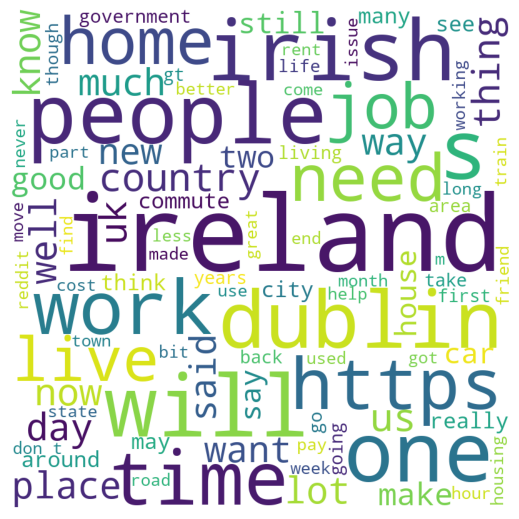

In [18]:
#Adding aditional stopwords to simplify the wordcloud output-This is specific to the domain we are exploring.
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add("year")
stopwords.add("even")
stopwords.add("u")
stopwords.add("org")
stopwords.add("wikipedia")
stopwords.add("x200b")
stopwords.add("amp")
stopwords.add("en")

# iterate through the file
for val in All_Comments2.Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 20).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# VADER Sentiment Analysis

In [19]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()


* a positive sentiment, compound ≥ 0.05.
* a negative sentiment, compound ≤ -0.05.
* a neutral sentiment, the compound is between ]-0.05, 0.05[

In [20]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound'] >= 0.05):
    polarity = "positive"

  elif(output_dict['compound'] <= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [21]:
All_Comments2["vader_prediction"] = All_Comments2["Text"].apply(predict_sentiment)

In [81]:
All_Comments2.sample(5)

,Text,vader_prediction,Sentiment_Score
Number,,,
86,"Hey guys (Irish, M 23),\nI am thinking of stud...",positive,1
23,"Hi Folks,\n\nTL;DR: I’ve just released a free ...",positive,1
74,\nEvents of today:\n\nUS:\n\n* The House Commi...,negative,0
40,"Born in County Waterford, Ireland, on August 3...",negative,0
19,"Hi, I'm looking to get a road bike for commuti...",positive,1


In [23]:
All_Comments2['Sentiment_Score'] = np.where(All_Comments2['vader_prediction'] == 'positive', 1, 0)

Overall_DF_Valence = All_Comments2['Sentiment_Score'].mean()

Overall_DF_Valence

0.7002551020408163

The polarity of the sentiment in our reddit scrape is positive regarding Irish Transportation on averaage. Where 1 = positive and 0 = Not positive and the Mean  is .7.

#  Logistic-regression Model Sentiment Analysis

In [24]:
BoWDF = All_Comments2

In [25]:
BoWDF['Sentiment_Score'] = np.where(BoWDF['vader_prediction'] == 'positive', 1, 0)

In [26]:
BoWDF.sample(5)

,Text,vader_prediction,Sentiment_Score
Number,,,
31,Maybe. If you think Ireland is genuinely eager...,positive,1
35,"Hi everyone,\n\nI’d mainly like to hear your s...",positive,1
31,Thank you very much for the cards! I am sorry ...,positive,1
79,\nLooking to turn my Cube mountain bike into a...,positive,1
1,I am not an expert on Irish law. But freedom o...,positive,1


In [27]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize, min_df = 20)
text_counts = cv.fit_transform(BoWDF['Text'])
y = BoWDF['Sentiment_Score']

text_counts

<784x1574 sparse matrix of type '<class 'numpy.int64'>'
	with 82658 stored elements in Compressed Sparse Row format>

In [28]:
#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, y, test_size=0.5, random_state=0)

In [29]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((784, 1574), (392, 1574), (392, 1574), (392,), (392,))

In [30]:
# Training the model

MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.7168367346938775


In [31]:
model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Validation and Testing: Confusion Matrix plus unit testing of a ingle comment input

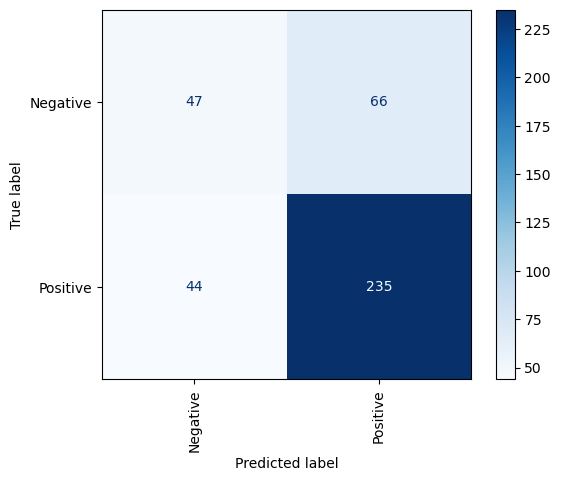

In [32]:
%matplotlib inline

cmd.from_estimator(model, X_test, Y_test,
                   display_labels=['Negative', 'Positive'],
                   cmap='Blues', xticks_rotation='vertical')

Testing the model wtih a test input for face validity

In [101]:
review = 'The commute was bad bad bad!!'
model.predict_proba(cv.transform([review]))[0][1]

0.4289832064121845

# Bag of Workds Sentiment Analysis

In [34]:
BoWDF = All_Comments2

In [35]:
# Instantiate an object cv by calling a method named as CountVectorzer()
cv1    = CountVectorizer(stop_words = 'english',ngram_range = (1, 2),tokenizer = token.tokenize)

# Train the dataset by calling a fit_transform() method
X_fin = cv.fit_transform(BoWDF['Text'])

# Display the rows and colums
X_fin.shape



(784, 1574)

In [36]:
y1=BoWDF['Sentiment_Score']
y1.shape

(784,)

In [37]:
X_fin

<784x1574 sparse matrix of type '<class 'numpy.int64'>'
	with 82658 stored elements in Compressed Sparse Row format>

In [38]:
# Instantiate an object model by calling a method MultinomialNB()
model1 = MultinomialNB()

In [39]:
# Split the dataset into training and testing parts
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fin, y1, test_size = 0.3)

In [40]:
# Train the model by calling a method fit()
model1.fit(X_train1,y_train1)

MultinomialNB()

In [41]:
# Call predict() method
y_pred = model1.predict(X_test1)

In [42]:
# Instantiate a mthod named as Cla
cf = classification_report(y_test1, y_pred)

# Display the values of an object cf
print(cf)

              precision    recall  f1-score   support

           0       0.69      0.33      0.45        72
           1       0.76      0.93      0.84       164

    accuracy                           0.75       236
   macro avg       0.72      0.63      0.64       236
weighted avg       0.74      0.75      0.72       236



Testing the model wtih a test input for face validity to compare against logistic regression model

In [43]:
#model1.predict_proba(cv1.transform([review]))[0][1]

# Machine Learning Section with Classifications

In [44]:
#reading Dataset
#IEDataset = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',',encoding = "ISO-8859-1", header= 0)
IEDataset = pd.read_csv("Data/Irish Commuting Data by Area.csv",  sep = ',', header= 0)

In [45]:
IEDataset.describe()

,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016,Broad_Industrial_Group_Recoded
count,132.000000,132.000000,132.000000,132.000000
mean,40.166667,13030.325758,17.296970,12.500000
std,29.468360,16921.097412,19.620666,6.368458
min,1.000000,14.000000,-34.900000,2.000000
25%,15.000000,1755.750000,3.250000,7.000000
50%,37.500000,6369.000000,13.650000,12.500000
75%,60.000000,16883.500000,28.875000,18.000000
max,90.000000,84010.000000,86.300000,23.000000


In [46]:
IEDataset

,Broad_Industrial_Group,Travelling_Time,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016,Broad_Industrial_Group_Recoded
0,"Agriculture, forestry and fishing (A)",< ¼ hour,1,19577,-4.0,2
1,"Agriculture, forestry and fishing (A)",¼ hour - < ½ hour,15,9910,3.3,2
2,"Agriculture, forestry and fishing (A)",½ hour - < ¾ hour,30,5557,2.7,2
3,"Agriculture, forestry and fishing (A)",¾ hour - < 1 hour,45,1307,8.1,2
4,"Agriculture, forestry and fishing (A)",1 hour - < 1½ hours,60,1878,18.9,2
...,...,...,...,...,...,...
127,Industry not stated,¼ hour - < ½ hour,15,19896,28.4,23
128,Industry not stated,½ hour - < ¾ hour,30,16484,36.8,23
129,Industry not stated,¾ hour - < 1 hour,45,4542,42.1,23
130,Industry not stated,1 hour - < 1½ hours,60,6206,61.6,23


In [47]:
RFM = IEDataset [ [ "Broad_Industrial_Group", "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [48]:
RFM_norm1 = IEDataset [ [ "Travelling_Time_Number", "Persons_at_work_2016_VALUE", "Percentage_change_of_persons_at_work_2011_2016" ]].copy ()

In [49]:
RFM_norm1

,Travelling_Time_Number,Persons_at_work_2016_VALUE,Percentage_change_of_persons_at_work_2011_2016
0,1,19577,-4.0
1,15,9910,3.3
2,30,5557,2.7
3,45,1307,8.1
4,60,1878,18.9
...,...,...,...
127,15,19896,28.4
128,30,16484,36.8
129,45,4542,42.1
130,60,6206,61.6


In [50]:
#Copy of the data before it's normalised in the next step
RFM_norm2 = RFM_norm1

In [51]:
# standardise all parameters
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

In [52]:
RFM_norm1

array([[-1.33417245,  0.38836808, -1.08957064],
       [-0.85727676, -0.18510695, -0.71609658],
       [-0.3463171 , -0.44333978, -0.74679308],
       [ 0.16464256, -0.69546235, -0.4705246 ],
       [ 0.67560222, -0.66158894,  0.08201236],
       [ 1.69752154, -0.7273781 , -0.33239036],
       [-1.33417245, -0.69914038, -1.57048244],
       [-0.85727676, -0.67102129, -1.31979437],
       [-0.3463171 , -0.71551351, -1.02817764],
       [ 0.16464256, -0.75585312, -1.15607972],
       [ 0.67560222, -0.75620906,  0.13317319],
       [ 1.69752154, -0.76487021,  0.25595918],
       [-1.33417245,  2.08417413, -0.77237349],
       [-0.85727676,  3.1203089 , -0.54726584],
       [-0.3463171 ,  1.73897384, -0.17890787],
       [ 0.16464256,  0.09365162,  0.0103872 ],
       [ 0.67560222, -0.02588413,  0.48106683],
       [ 1.69752154, -0.51642567,  0.23549485],
       [-1.33417245, -0.68401302, -0.80306999],
       [-0.85727676, -0.57367232, -0.63935534],
       [-0.3463171 , -0.57705373, -0.250

# K-Means with some K

In [53]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,-1.334172,0.388368,-1.089571
1,-0.857277,-0.185107,-0.716097
2,-0.346317,-0.443340,-0.746793
3,0.164643,-0.695462,-0.470525
4,0.675602,-0.661589,0.082012


In [54]:
# Kmeans
model_clus5 = KMeans(n_clusters = 3, max_iter=500)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=500, n_clusters=3)

## Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [55]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

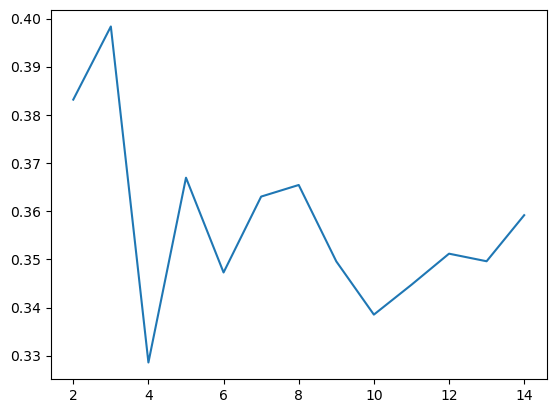

In [56]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

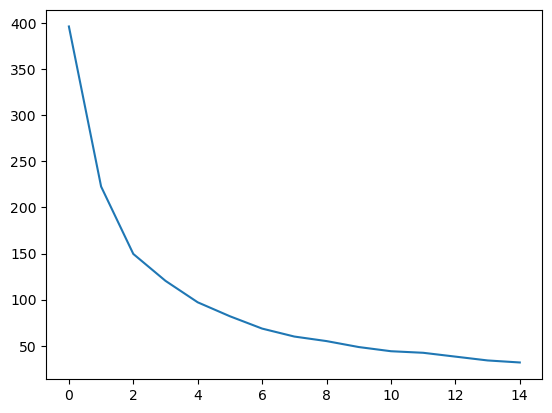

In [57]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,16)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=500)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

# Results of Clsuters Formed

In [58]:
# analysis of clusters formed
RFM = RFM_norm2
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['Commute_Duration', 'Sample_Size', 'Sample_Volatility', 'ClusterID']

km_clusters_amount = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Size.mean())
km_clusters_frequency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Commute_Duration.mean())
km_clusters_recency = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Sample_Volatility.mean())

In [59]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Sample_Size", "Commute_Duration", "Sample_Volatility"]
df.head()

,ClusterID,Sample_Size,Commute_Duration,Sample_Volatility
0,0,11419.566667,20.783333,5.028333
1,1,4708.500000,66.465517,32.644828
2,2,54409.714286,14.285714,6.292857


<Axes: xlabel='ClusterID', ylabel='Sample_Size'>

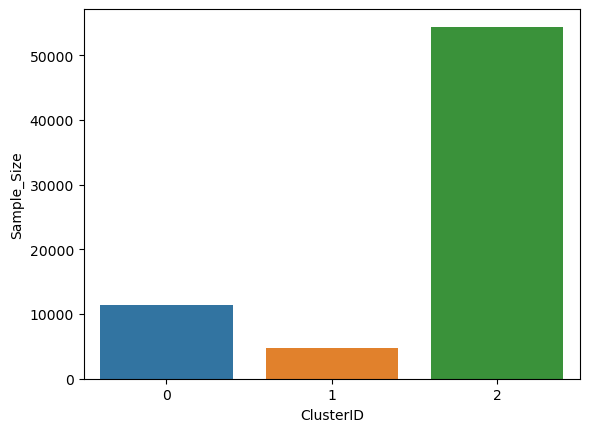

In [60]:
sns.barplot(x=df.ClusterID, y=df.Sample_Size)

<Axes: xlabel='ClusterID', ylabel='Commute_Duration'>

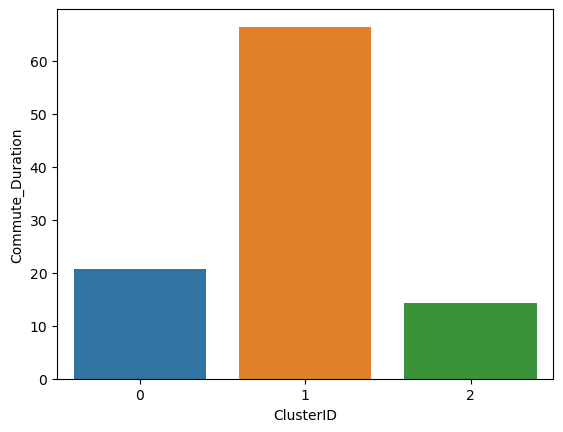

In [61]:
sns.barplot(x=df.ClusterID, y=df.Commute_Duration)

<Axes: xlabel='ClusterID', ylabel='Sample_Volatility'>

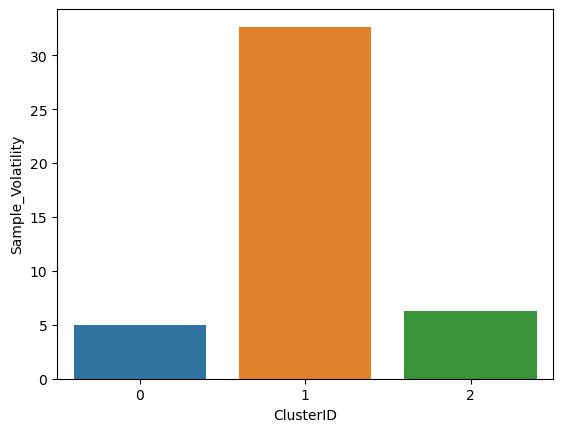

In [62]:
sns.barplot(x=df.ClusterID, y=df.Sample_Volatility)

See Project Submission for discussion of the 3 clusters found in the above clustering exercises.

# GridSearchCV: SVC

In [63]:
# Load the dataset and split it into training and testing sets
#X, y = load_iris(return_X_y=True)
y = IEDataset [ [ "Broad_Industrial_Group_Recoded" ]].copy ()
y = y.to_numpy()
y = y.reshape((-1,))
X = RFM_norm1


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [64]:
X.shape

(132, 3)

In [65]:
y.shape

(132,)

In [66]:
# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10, 100],'gamma': [0.01, 0.1, 1, 10], 'max_iter' : [1000]}

In [67]:
# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(), param_grid)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79, 3), (53, 3), (79,), (53,))

In [69]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [1000]})

In [70]:
# Print the best parameters and score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': 1000}
Best score: 0.215


In [71]:
# Predict on the test data using the best estimator
y_pred = grid.predict(X_test)

In [72]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

TypeError: 'numpy.float64' object is not callable

Different estimators are better suited for different types of data and different problems. 
We can see in the above from the SVC angle the linear model is the reccomended crtieria from Grid Search CV, 
but has a low accuracy score. SVC isn't looking good.

# GridSearchCV: KMeans

In [ ]:
# Define parameter grid for KMeans
param_grid = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'kmeans__init': ['k-means++', 'random'],
    'kmeans__max_iter': [100, 200, 300]
}

In [ ]:
# Create pipeline with scaling and KMeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

In [ ]:
# Initialize GridSearchCV with pipeline, parameter grid, and scoring function
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [ ]:
# Fit GridSearchCV on data
grid_search.fit(X_train, y_train)

In [ ]:
# Get best parameters and best estimator
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

In [ ]:
# Predict on the test data using the best estimator
y_pred = grid_search.predict(X_test)

In [ ]:
# Print the accuracy on the test data
print("Accuracy:", accuracy_score(y_test, y_pred))

The kmeans++ model was proffered by GridSearch CV, but let's look at doing this step by step given the small dataset 
and that that technically we don't expect huge patterns or trends to be observed in the data, 
but let's see what the modelling can provide us with-Perhaps some new insight we couldn't have seen otherwise without 
large computing power.